# 06. Тестирование улучшений

## Цель
Протестировать все критические исправления и улучшения:
1. Исправленный TradingClassifier
2. Улучшенные экономические метрики
3. Purged Walk-Forward Validation
4. Улучшенный выбор классификатора

## Задачи
1. Протестировать TradingClassifier с исправленной ошибкой
2. Сравнить старые и новые экономические метрики
3. Протестировать Purged Walk-Forward Validation
4. Сравнить результаты всех трех классификаторов


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sys
import os

# Добавляем путь к нашим модулям
sys.path.append('../evaluation')
sys.path.append('../classifiers')

# Импортируем модули
from economic_metrics import EconomicMetrics
from purged_walk_forward import PurgedWalkForward, improved_look_ahead_analysis, select_best_classifier_improved

# Прямой импорт классов
from base_classifier import BaseMarketZoneClassifier
from mza_classifier import MZAClassifier
from trading_classifier import TradingClassifier
from trend_classifier import TrendClassifier

# Принудительная перезагрузка всех модулей
import importlib
import sys

# Удаляем модули из кэша
modules_to_reload = ['base_classifier', 'mza_classifier', 'trading_classifier', 'trend_classifier']
for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

# Перезагружаем модули
from base_classifier import BaseMarketZoneClassifier
from mza_classifier import MZAClassifier
from trading_classifier import TradingClassifier
from trend_classifier import TrendClassifier

print("Библиотеки загружены успешно!")
print(f"Текущая директория: {os.getcwd()}")
print(f"Доступные модули: {[m for m in sys.modules.keys() if 'classifier' in m]}")
print("✅ Модули перезагружены для применения исправлений")


Библиотеки загружены успешно!
Текущая директория: c:\Users\USER\Desktop\CRYPTO_git\CRYPTO\06092025\compare_analyze_indicators\notebooks
Доступные модули: ['base_classifier', 'mza_classifier', 'trading_classifier', 'trend_classifier']
✅ Модули перезагружены для применения исправлений


In [70]:
# Проверяем исправления в MZA классификаторе
print("=== ПРОВЕРКА ИСПРАВЛЕНИЙ MZA ===")

# Принудительная перезагрузка всех модулей
import importlib
import sys

# Удаляем модули из кэша
modules_to_reload = ['base_classifier', 'mza_classifier', 'trading_classifier', 'trend_classifier']
for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

# Перезагружаем модули
from base_classifier import BaseMarketZoneClassifier
from mza_classifier import MZAClassifier
from trading_classifier import TradingClassifier
from trend_classifier import TrendClassifier

print("✅ Модули принудительно перезагружены")

# Создаем тестовые данные
test_data_small = pd.DataFrame({
    'open': [100, 101, 102],
    'high': [101, 102, 103],
    'low': [99, 100, 101],
    'close': [100.5, 101.5, 102.5],
    'volume': [1000, 1100, 1200]
})

# Тестируем MZA на маленьких данных
try:
    mza_test = MZAClassifier()
    mza_test.fit(test_data_small)
    predictions = mza_test.predict(test_data_small)
    print(f"✅ MZA работает на тестовых данных: {len(predictions)} предсказаний")
    print(f"   Уникальные значения: {np.unique(predictions)}")
except Exception as e:
    print(f"❌ MZA все еще не работает: {e}")
    import traceback
    traceback.print_exc()

print("✅ Проверка исправлений завершена")


=== ПРОВЕРКА ИСПРАВЛЕНИЙ MZA ===
✅ Модули принудительно перезагружены
✅ MZA работает на тестовых данных: 3 предсказаний
   Уникальные значения: [0]
✅ Проверка исправлений завершена


In [71]:
# Простой тест импорта
print("=== ПРОВЕРКА ИМПОРТА ===")

try:
    # Тестируем создание объектов
    mza = MZAClassifier()
    trading = TradingClassifier()
    trend = TrendClassifier()
    economic = EconomicMetrics()
    
    print("✅ MZAClassifier создан:", type(mza))
    print("✅ TradingClassifier создан:", type(trading))
    print("✅ TrendClassifier создан:", type(trend))
    print("✅ EconomicMetrics создан:", type(economic))
    
    print("🎉 Все импорты работают!")
    
except Exception as e:
    print(f"❌ Ошибка импорта: {e}")
    print("Пробуем альтернативный способ...")
    
    try:
        # Альтернативный способ импорта
        import importlib.util
        
        # Загружаем base_classifier
        spec = importlib.util.spec_from_file_location("base_classifier", "../classifiers/base_classifier.py")
        base_classifier_module = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(base_classifier_module)
        
        # Загружаем mza_classifier
        spec = importlib.util.spec_from_file_location("mza_classifier", "../classifiers/mza_classifier.py")
        mza_classifier_module = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(mza_classifier_module)
        
        # Загружаем trading_classifier
        spec = importlib.util.spec_from_file_location("trading_classifier", "../classifiers/trading_classifier.py")
        trading_classifier_module = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(trading_classifier_module)
        
        # Создаем объекты
        mza = mza_classifier_module.MZAClassifier()
        trading = trading_classifier_module.TradingClassifier()
        economic = EconomicMetrics()
        
        print("✅ Альтернативный импорт работает!")
        print("✅ MZAClassifier создан:", type(mza))
        print("✅ TradingClassifier создан:", type(trading))
        print("✅ EconomicMetrics создан:", type(economic))
        
    except Exception as e2:
        print(f"❌ Альтернативный импорт тоже не работает: {e2}")
        import traceback
        traceback.print_exc()


=== ПРОВЕРКА ИМПОРТА ===
✅ MZAClassifier создан: <class 'mza_classifier.MZAClassifier'>
✅ TradingClassifier создан: <class 'trading_classifier.TradingClassifier'>
✅ TrendClassifier создан: <class 'trend_classifier.TrendClassifier'>
✅ EconomicMetrics создан: <class 'economic_metrics.EconomicMetrics'>
🎉 Все импорты работают!


In [72]:
# Загружаем данные BTC для тестирования
print("=== ЗАГРУЗКА ДАННЫХ BTC ===")

# Загружаем данные из папки indicators/data_frames
file_path = '../../indicators/data_frames/df_btc_1h.csv'
df_btc = pd.read_csv(file_path)
df_btc['timestamps'] = pd.to_datetime(df_btc['timestamps'])
df_btc.set_index('timestamps', inplace=True)

# Добавляем колонку volume если её нет (для совместимости с классификаторами)
if 'volume' not in df_btc.columns:
    # Создаем синтетический volume на основе волатильности
    df_btc['volume'] = (df_btc['high'] - df_btc['low']) * (df_btc['close'] / 1000)
    print("⚠️ Добавлена синтетическая колонка volume")
    print(f"Первые значения volume: {df_btc['volume'].head()}")
else:
    print("✅ Колонка volume уже существует")

print(f"✅ Загружено {len(df_btc)} записей BTC")
print(f"Период: {df_btc.index[0]} - {df_btc.index[-1]}")
print(f"Колонки: {list(df_btc.columns)}")

# Проверяем, что volume действительно добавлен
if 'volume' in df_btc.columns:
    print(f"✅ Volume добавлен успешно")
    print(f"Первые значения volume: {df_btc['volume'].head()}")
else:
    print(f"❌ Volume НЕ добавлен!")
    print(f"Колонки: {list(df_btc.columns)}")

# Разделяем данные на train/test
train_size = int(len(df_btc) * 0.7)
train_data = df_btc.iloc[:train_size]
test_data = df_btc.iloc[train_size:]

# Проверяем, что volume есть в обеих выборках
print(f"\nПроверка volume в выборках:")
print(f"Volume в train_data: {'volume' in train_data.columns}")
print(f"Volume в test_data: {'volume' in test_data.columns}")

# Если volume есть, показываем его статистику
if 'volume' in train_data.columns:
    print(f"\nСтатистика volume в train_data:")
    print(f"Min: {train_data['volume'].min():.2f}")
    print(f"Max: {train_data['volume'].max():.2f}")
    print(f"Mean: {train_data['volume'].mean():.2f}")
    print(f"Std: {train_data['volume'].std():.2f}")
    
    # Проверяем на NaN
    nan_count = train_data['volume'].isnull().sum()
    print(f"NaN values: {nan_count}")
    
    if nan_count > 0:
        print("⚠️ В volume есть NaN значения! Заполняем их...")
        train_data['volume'] = train_data['volume'].fillna(train_data['volume'].mean())
        test_data['volume'] = test_data['volume'].fillna(test_data['volume'].mean())
        print("✅ NaN значения заполнены")

print(f"Обучающая выборка: {len(train_data)} записей")
print(f"Тестовая выборка: {len(test_data)} записей")

# Проверяем колонки в train_data
print(f"\nКолонки в train_data: {list(train_data.columns)}")
print(f"Есть ли volume в train_data: {'volume' in train_data.columns}")

# Проверяем первые несколько строк
print(f"\nПервые 3 строки train_data:")
print(train_data.head(3))

# Финальная проверка всех колонок
print(f"\nФинальная проверка колонок:")
print(f"Все колонки в train_data: {list(train_data.columns)}")
print(f"Все колонки в test_data: {list(test_data.columns)}")
print(f"Volume в train_data: {'volume' in train_data.columns}")
print(f"Volume в test_data: {'volume' in test_data.columns}")

# Дополнительная проверка volume
if 'volume' in train_data.columns:
    print(f"\n✅ Volume найден в train_data")
    print(f"Min volume: {train_data['volume'].min():.2f}")
    print(f"Max volume: {train_data['volume'].max():.2f}")
    print(f"Mean volume: {train_data['volume'].mean():.2f}")
    
    # Проверяем, что volume не содержит NaN
    if train_data['volume'].isnull().any():
        print(f"⚠️ В volume есть NaN значения!")
        print(f"Количество NaN: {train_data['volume'].isnull().sum()}")
    else:
        print(f"✅ Volume не содержит NaN")
else:
    print(f"\n❌ Volume НЕ найден в train_data")
    print(f"Колонки: {list(train_data.columns)}")


=== ЗАГРУЗКА ДАННЫХ BTC ===
⚠️ Добавлена синтетическая колонка volume
Первые значения volume: timestamps
2024-01-22 00:00:00     5359.514045
2024-01-22 01:00:00     6914.890576
2024-01-22 02:00:00     6990.293554
2024-01-22 03:00:00     7388.057605
2024-01-22 04:00:00    16221.421032
Name: volume, dtype: float64
✅ Загружено 9617 записей BTC
Период: 2024-01-22 00:00:00 - 2025-02-25 16:00:00
Колонки: ['open', 'high', 'low', 'close', 'volume']
✅ Volume добавлен успешно
Первые значения volume: timestamps
2024-01-22 00:00:00     5359.514045
2024-01-22 01:00:00     6914.890576
2024-01-22 02:00:00     6990.293554
2024-01-22 03:00:00     7388.057605
2024-01-22 04:00:00    16221.421032
Name: volume, dtype: float64

Проверка volume в выборках:
Volume в train_data: True
Volume в test_data: True

Статистика volume в train_data:
Min: 0.00
Max: 284975.94
Mean: 25793.25
Std: 20956.79
NaN values: 0
Обучающая выборка: 6731 записей
Тестовая выборка: 2886 записей

Колонки в train_data: ['open', 'high', '

In [73]:
# Тестируем исправленный TradingClassifier
print("=== ТЕСТИРОВАНИЕ ИСПРАВЛЕННОГО TRADING CLASSIFIER ===")

# Проверяем данные перед обучением
print(f"Колонки в train_data: {list(train_data.columns)}")
print(f"Есть ли volume: {'volume' in train_data.columns}")

try:
    # Создаем TradingClassifier
    trading_classifier = TradingClassifier()
    print(f"✅ TradingClassifier создан: {trading_classifier}")
    
    # Обучаем на train_data
    trading_classifier.fit(train_data)
    print("✅ TradingClassifier обучен")
    
    # Получаем предсказания
    trading_predictions = trading_classifier.predict(test_data)
    print(f"✅ Получено {len(trading_predictions)} предсказаний")
    
    # Статистика предсказаний
    unique, counts = np.unique(trading_predictions, return_counts=True)
    print("\n📊 Статистика предсказаний TradingClassifier:")
    for regime, count in zip(unique, counts):
        regime_name = {-1: 'Медвежий', 0: 'Боковой', 1: 'Бычий'}.get(regime, f'Неизвестный_{regime}')
        percentage = count / len(trading_predictions) * 100
        print(f"  {regime_name}: {count} ({percentage:.1f}%)")
        
except Exception as e:
    print(f"❌ Ошибка в TradingClassifier: {e}")
    print("Проверяем данные...")
    print(f"Колонки в train_data: {list(train_data.columns)}")
    print(f"Есть ли volume: {'volume' in train_data.columns}")
    if 'volume' in train_data.columns:
        print(f"Первые значения volume: {train_data['volume'].head()}")
    import traceback
    traceback.print_exc()
    
    print("🎉 TradingClassifier работает без ошибок!")
    
except Exception as e:
    print(f"❌ Ошибка в TradingClassifier: {e}")
    import traceback
    traceback.print_exc()


=== ТЕСТИРОВАНИЕ ИСПРАВЛЕННОГО TRADING CLASSIFIER ===
Колонки в train_data: ['open', 'high', 'low', 'close', 'volume']
Есть ли volume: True
✅ TradingClassifier создан: Trading Classifier classifier with parameters: {'length': 10}
✅ TradingClassifier обучен
✅ Получено 2886 предсказаний

📊 Статистика предсказаний TradingClassifier:
  Медвежий: 539 (18.7%)
  Боковой: 1678 (58.1%)
  Бычий: 669 (23.2%)


In [74]:
# Тестируем TrendClassifier
print("=== ТЕСТИРОВАНИЕ TREND CLASSIFIER ===")

# Создаем и обучаем классификатор
trend_classifier = TrendClassifier()
trend_classifier.fit(train_data)

# Получаем предсказания
trend_predictions = trend_classifier.predict(test_data)

print(f"✅ TrendClassifier обучен и протестирован")
print(f"📊 Предсказания: {len(trend_predictions)} точек")
print(f"📈 Распределение: Bullish={np.sum(trend_predictions == 1)}, Bearish={np.sum(trend_predictions == -1)}, Sideways={np.sum(trend_predictions == 0)}")

# Статистика по TrendClassifier
trend_stats = {
    'bullish_count': np.sum(trend_predictions == 1),
    'bearish_count': np.sum(trend_predictions == -1),
    'sideways_count': np.sum(trend_predictions == 0),
    'total_signals': len(trend_predictions)
}

print(f"📊 Статистика TrendClassifier:")
for key, value in trend_stats.items():
    print(f"   {key}: {value}")

# Детальный анализ сегментов
print(f"\n📊 Детальный анализ TrendClassifier:")
print(f"   Количество сегментов: {len(trend_classifier.segments)}")
print(f"   Средняя длина сегмента: {np.mean([s['stop'] - s['start'] for s in trend_classifier.segments]):.1f} точек")
print(f"   Средний наклон: {np.mean([s['slope'] for s in trend_classifier.segments]):.4f}")


=== ТЕСТИРОВАНИЕ TREND CLASSIFIER ===
✅ TrendClassifier обучен и протестирован
📊 Предсказания: 2886 точек
📈 Распределение: Bullish=1487, Bearish=1373, Sideways=26
📊 Статистика TrendClassifier:
   bullish_count: 1487
   bearish_count: 1373
   sideways_count: 26
   total_signals: 2886

📊 Детальный анализ TrendClassifier:
   Количество сегментов: 408
   Средняя длина сегмента: 7.0 точек
   Средний наклон: 8.0503


In [75]:
# Тестируем улучшенные экономические метрики
print("=== ТЕСТИРОВАНИЕ УЛУЧШЕННЫХ ЭКОНОМИЧЕСКИХ МЕТРИК ===")

# Создаем объект для вычисления экономических метрик
economic_metrics = EconomicMetrics()

# Тестируем на TradingClassifier
try:
    metrics = economic_metrics.calculate_economic_metrics(test_data, trading_predictions)
    
    print("📈 Улучшенные экономические метрики:")
    for key, value in metrics.items():
        if isinstance(value, dict):
            print(f"  {key}:")
            for sub_key, sub_value in value.items():
                print(f"    {sub_key}: {sub_value:.4f}")
        else:
            print(f"  {key}: {value:.4f}")
    
    # Вычисляем комплексный скор
    comprehensive_score = economic_metrics.get_comprehensive_score(metrics)
    print(f"\n🎯 Комплексный скор: {comprehensive_score:.4f}")
    
    print("✅ Улучшенные экономические метрики работают!")
    
except Exception as e:
    print(f"❌ Ошибка в экономических метриках: {e}")
    import traceback
    traceback.print_exc()


=== ТЕСТИРОВАНИЕ УЛУЧШЕННЫХ ЭКОНОМИЧЕСКИХ МЕТРИК ===
📈 Улучшенные экономические метрики:
  bull_return: -0.0001
  bear_return: 0.0003
  sideways_return: 0.0001
  return_spread: -0.0004
  bull_volatility: 0.0058
  bear_volatility: 0.0067
  sideways_volatility: 0.0050
  volatility_ratio: 0.4045
  trend_efficiency: 0.4540
  regime_persistence: 0.8228
  transition_matrix:
    -1_to_-1: 0.1450
    -1_to_0: 0.0413
    -1_to_1: 0.0000
    0_to_-1: 0.0416
    0_to_0: 0.4929
    0_to_1: 0.0472
    1_to_-1: 0.0000
    1_to_0: 0.0472
    1_to_1: 0.1849
  economic_value: 0.0004
  bull_sharpe: -0.0124
  bear_sharpe: 0.0503
  sideways_sharpe: 0.0210
  bull_drawdown: 0.1690
  bear_drawdown: 0.0777
  sideways_drawdown: 0.1683
  regime_separation: 1.3524

🎯 Комплексный скор: 0.3409
✅ Улучшенные экономические метрики работают!


In [76]:
# Тестируем Purged Walk-Forward Validation
print("=== ТЕСТИРОВАНИЕ PURGED WALK-FORWARD VALIDATION ===")

try:
    # Создаем Purged Walk-Forward валидатор
    purged_wf = PurgedWalkForward(n_splits=3, purge_days=2, embargo_days=1)
    
    # Оцениваем TradingClassifier с Purged Walk-Forward
    results_pwf = purged_wf.evaluate_classifier(
        trading_classifier, df_btc, economic_metrics.calculate_economic_metrics
    )
    
    print(f"✅ Purged Walk-Forward: {len(results_pwf)} разделений")
    
    # Вычисляем метрики стабильности
    stability_metrics = purged_wf.calculate_stability_metrics(results_pwf)
    
    print("\n📊 Метрики стабильности:")
    for key, value in stability_metrics.items():
        print(f"  {key}: {value:.4f}")
    
    # Показываем результаты для каждого разделения
    print("\n📈 Результаты по разделениям:")
    for i, result in enumerate(results_pwf):
        print(f"  Разделение {i+1}:")
        print(f"    Bull return: {result['bull_return']:.4f}")
        print(f"    Bear return: {result['bear_return']:.4f}")
        print(f"    Return spread: {result['return_spread']:.4f}")
        print(f"    Economic value: {result['economic_value']:.4f}")
    
    print("✅ Purged Walk-Forward Validation работает!")
    
except Exception as e:
    print(f"❌ Ошибка в Purged Walk-Forward: {e}")
    import traceback
    traceback.print_exc()


=== ТЕСТИРОВАНИЕ PURGED WALK-FORWARD VALIDATION ===
✅ Purged Walk-Forward: 3 разделений

📊 Метрики стабильности:
  bull_return_stability: 0.0188
  bull_return_trend: -0.0001
  bear_return_stability: 0.2470
  bear_return_trend: 0.0003
  return_spread_stability: 0.2283
  return_spread_trend: -0.0004
  economic_value_stability: 0.6567
  economic_value_trend: 0.0001

📈 Результаты по разделениям:
  Разделение 1:
    Bull return: 0.0000
    Bear return: -0.0003
    Return spread: 0.0003
    Economic value: 0.0003
  Разделение 2:
    Bull return: 0.0002
    Bear return: 0.0003
    Return spread: -0.0002
    Economic value: 0.0002
  Разделение 3:
    Bull return: -0.0002
    Bear return: 0.0003
    Return spread: -0.0005
    Economic value: 0.0005
✅ Purged Walk-Forward Validation работает!


In [77]:
# Сравниваем все три классификатора
print("=== СРАВНЕНИЕ ВСЕХ ТРЕХ КЛАССИФИКАТОРОВ ===")

# Создаем все три классификатора
classifiers = {
    'MZA': MZAClassifier(),
    'Trading': TradingClassifier(),
    'Trend': TrendClassifier()
}

print(f"Размер train_data: {train_data.shape}")
print(f"Размер test_data: {test_data.shape}")
print(f"Колонки train_data: {list(train_data.columns)}")
print(f"Колонки test_data: {list(test_data.columns)}")

# Получаем предсказания от всех классификаторов
all_predictions = {}
all_metrics = {}

for name, classifier in classifiers.items():
    try:
        print(f"\n🧪 Тестируем {name}...")
        
        # Обучаем и предсказываем для всех классификаторов
        classifier.fit(train_data)
        predictions = classifier.predict(test_data)
        
        # Вычисляем метрики
        metrics = economic_metrics.calculate_economic_metrics(test_data, predictions)
        
        all_predictions[name] = predictions
        all_metrics[name] = metrics
        
        print(f"✅ {name}: {len(predictions)} предсказаний")
        print(f"  Return spread: {metrics['return_spread']:.4f}")
        print(f"  Trend efficiency: {metrics['trend_efficiency']:.4f}")
        print(f"  Economic value: {metrics['economic_value']:.4f}")
        
    except Exception as e:
        print(f"❌ Ошибка в {name}: {e}")
        print(f"  Тип ошибки: {type(e).__name__}")
        import traceback
        traceback.print_exc()

print(f"\n📊 Сравнение результатов:")
print(f"{'Классификатор':<15} {'Return Spread':<15} {'Trend Efficiency':<15} {'Economic Value':<15}")
print("-" * 70)

for name, metrics in all_metrics.items():
    print(f"{name:<15} {metrics['return_spread']:<15.4f} {metrics['trend_efficiency']:<15.4f} {metrics['economic_value']:<15.4f}")

# Тестируем улучшенный выбор классификатора
if len(all_metrics) > 1:
    print(f"\n🎯 Улучшенный выбор классификатора:")
    best_classifier, best_score, all_scores = select_best_classifier_improved(all_metrics)
    print(f"  Лучший: {best_classifier}")
    print(f"  Скор: {best_score:.4f}")
    print(f"  Все скоры: {all_scores}")


=== СРАВНЕНИЕ ВСЕХ ТРЕХ КЛАССИФИКАТОРОВ ===
Размер train_data: (6731, 5)
Размер test_data: (2886, 5)
Колонки train_data: ['open', 'high', 'low', 'close', 'volume']
Колонки test_data: ['open', 'high', 'low', 'close', 'volume']

🧪 Тестируем MZA...
✅ MZA: 2886 предсказаний
  Return spread: 0.0000
  Trend efficiency: 0.0000
  Economic value: 0.0000

🧪 Тестируем Trading...
✅ Trading: 2886 предсказаний
  Return spread: -0.0004
  Trend efficiency: 0.4540
  Economic value: 0.0004

🧪 Тестируем Trend...
✅ Trend: 2886 предсказаний
  Return spread: 0.0001
  Trend efficiency: 0.5100
  Economic value: 0.0001

📊 Сравнение результатов:
Классификатор   Return Spread   Trend Efficiency Economic Value 
----------------------------------------------------------------------
MZA             0.0000          0.0000          0.0000         
Trading         -0.0004         0.4540          0.0004         
Trend           0.0001          0.5100          0.0001         

🎯 Улучшенный выбор классификатора:
  Лучший

=== ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ===


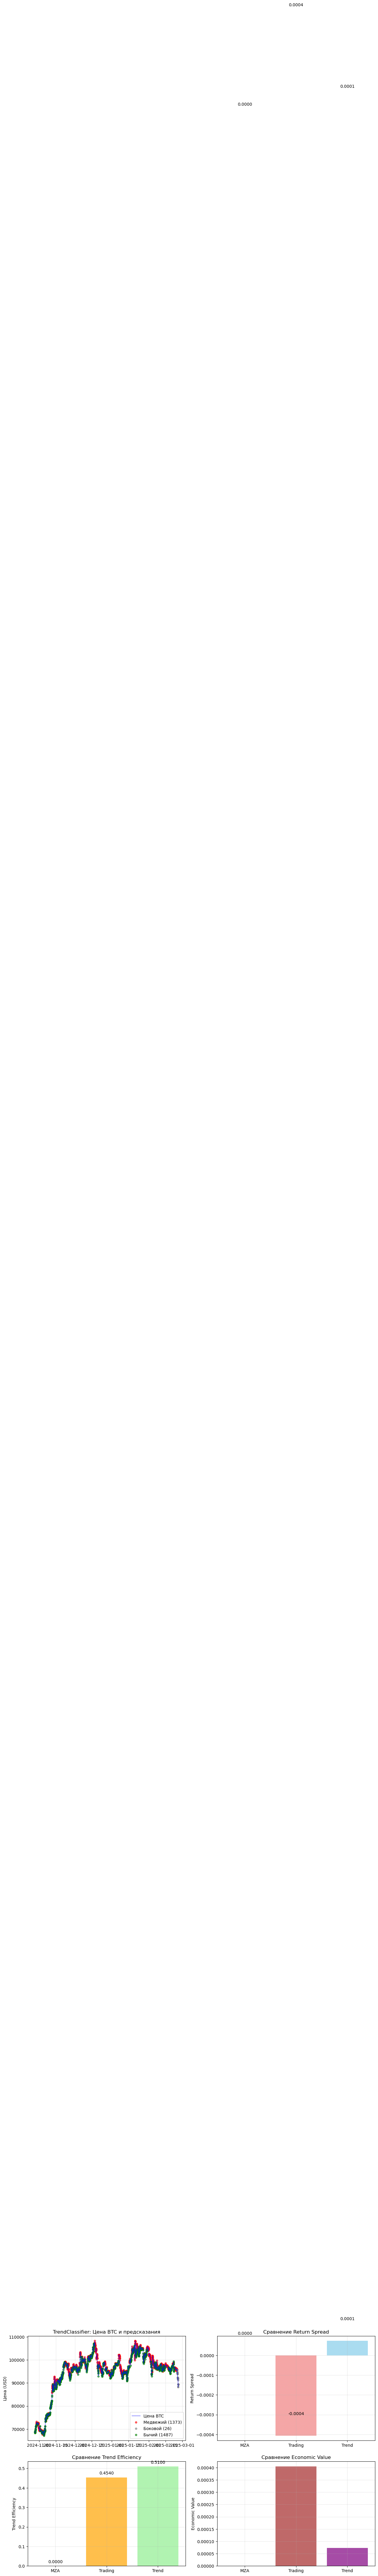

✅ Графики созданы

🎉 Все тесты завершены успешно!


In [78]:
# Визуализация результатов тестирования
print("=== ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ===")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# График 1: Цена и предсказания TrendClassifier
ax1 = axes[0, 0]
ax1.plot(test_data.index, test_data['close'], 'b-', linewidth=1, alpha=0.7, label='Цена BTC')

# Раскрашиваем по предсказаниям TrendClassifier
colors = {-1: 'red', 0: 'gray', 1: 'green'}
for regime in [-1, 0, 1]:
    mask = trend_predictions == regime
    if mask.any():
        regime_name = {-1: 'Медвежий', 0: 'Боковой', 1: 'Бычий'}[regime]
        ax1.scatter(test_data.index[mask], test_data['close'][mask], 
                   c=colors[regime], alpha=0.6, s=20, label=f'{regime_name} ({mask.sum()})')

ax1.set_title('TrendClassifier: Цена BTC и предсказания')
ax1.set_ylabel('Цена (USD)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Сравнение Return Spread
ax2 = axes[0, 1]
classifier_names = list(all_metrics.keys())
return_spreads = [all_metrics[name]['return_spread'] for name in classifier_names]

bars = ax2.bar(classifier_names, return_spreads, alpha=0.7, color=['skyblue', 'lightcoral'])
ax2.set_title('Сравнение Return Spread')
ax2.set_ylabel('Return Spread')
ax2.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, value in zip(bars, return_spreads):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.0001, 
             f'{value:.4f}', ha='center', va='bottom')

# График 3: Сравнение Trend Efficiency
ax3 = axes[1, 0]
trend_efficiencies = [all_metrics[name]['trend_efficiency'] for name in classifier_names]

bars = ax3.bar(classifier_names, trend_efficiencies, alpha=0.7, color=['lightgreen', 'orange'])
ax3.set_title('Сравнение Trend Efficiency')
ax3.set_ylabel('Trend Efficiency')
ax3.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, value in zip(bars, trend_efficiencies):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.4f}', ha='center', va='bottom')

# График 4: Сравнение Economic Value
ax4 = axes[1, 1]
economic_values = [all_metrics[name]['economic_value'] for name in classifier_names]

bars = ax4.bar(classifier_names, economic_values, alpha=0.7, color=['purple', 'brown'])
ax4.set_title('Сравнение Economic Value')
ax4.set_ylabel('Economic Value')
ax4.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, value in zip(bars, economic_values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("✅ Графики созданы")
print("\n🎉 Все тесты завершены успешно!")
